<a href="https://colab.research.google.com/github/manoshiraha19/Cropland-Identification-and-Yield-Prediction-using-Multimodal-ML/blob/main/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

sns.set_theme()

In [ ]:
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
start_time = datetime.now()

In [ ]:
def assessment(f_data, f_y_feature, f_x_feature, f_index=-1):
    """
    Develops and displays a histogram and a scatter plot for a dependent / independent variable pair from
    a dataframe and, optionally, highlights a specific observation on the plot in a different color (red).

    Also optionally, if an independent feature is not informed, the scatterplot is not displayed.

    Keyword arguments:

    f_data      Tensor containing the dependent / independent variable pair.
                Pandas dataframe
    f_y_feature Dependent variable designation.
                String
                f_x_feature Independent variable designation.
                String
    f_index     If greater or equal to zero, the observation denoted by f_index will be plotted in red.
                Integer
    """
    for f_row in f_data:
        if f_index >= 0:
            f_color = np.where(f_data[f_row].index == f_index,'r','g')
            f_hue = None
        else:
            f_color = 'b'
            f_hue = None

    f_fig, f_a = plt.subplots(1, 2, figsize=(16,4))

    f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')
    f_chart1.set_xlabel(f_x_feature,fontsize=10)

    if f_index >= 0:
        f_chart2 = plt.scatter(f_data[f_x_feature], f_data[f_y_feature], c=f_color, edgecolors='w')
        f_chart2 = plt.xlabel(f_x_feature, fontsize=10)
        f_chart2 = plt.ylabel(f_y_feature, fontsize=10)
    else:
        f_chart2 = sns.scatterplot(x=f_x_feature, y=f_y_feature, data=f_data, hue=f_hue, legend=False)
        f_chart2.set_xlabel(f_x_feature,fontsize=10)
        f_chart2.set_ylabel(f_y_feature,fontsize=10)

    plt.show()


def correlation_map(f_data, f_feature, f_number):
    """
    Develops and displays a heatmap plot referenced to a primary feature of a dataframe, highlighting
    the correlation among the 'n' mostly correlated features of the dataframe.

    Keyword arguments:

    f_data      Tensor containing all relevant features, including the primary.
                Pandas dataframe
    f_feature   The primary feature.
                String
    f_number    The number of features most correlated to the primary feature.
                Integer
    """
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()

    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True

    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(40, 20))
        f_map = sns.heatmap(f_correlation, mask=f_mask, vmin=-1, vmax=1, square=True,
                            center=0, cmap="RdYlBu")
    plt.show()

In [ ]:
# Importing the dataset
#, on_bad_lines='skip'
dataset = pd.read_csv('C:\\Users\\Manoshi Raha\\OneDrive\\Desktop\\Practice\\Capstone\\Datasets\\CropFeatureDataset.csv')
dataset = dataset.sample(frac=1)

In [ ]:
dataset.head()

label      f1      f2      f3      f4      f5      f6       f7  \
67754      1 -16.435 -27.097 -16.738 -20.305 -15.511 -20.742  0.30307   
70881      1 -16.420 -27.258 -17.013 -20.667 -15.558 -20.866  0.59299   
59902      1 -16.031 -25.369 -16.777 -19.291 -16.082 -19.058  0.74612   
3002       1 -18.199 -28.014 -19.573 -21.525 -18.385 -22.070  1.37440   
38193      1 -16.273 -25.336 -16.829 -19.316 -16.068 -19.654  0.55575   

            f8       f9  ...     f165      f166  f167  f168  f169  f170  f171  \
67754 -10.6620 -10.3590  ...  0.50617 -0.188980   1.0   0.0   1.0   0.0   0.0   
70881 -10.8380 -10.2450  ...  0.33333  0.500000   1.0   0.0   1.0   0.0   0.0   
59902  -9.3383  -8.5921  ...  0.65432  0.000007   2.0   0.0   1.0   0.0   0.0   
3002   -9.8149  -8.4405  ...  0.38272 -0.500000   2.0   0.0   1.0   0.0   0.0   
38193  -9.0631  -8.5073  ...  1.00000  1.000000   1.0   0.0   1.0   0.0   0.0   

       f172  f173  f174  
67754   0.0   1.0   1.0  
70881   0.0   1.0   1.0  
59902   0.0   1.0   1.0  
3002    0.0   1.0   1.0  
38193   0.0   1.0   1.0  

[5 rows x 175 columns]

In [ ]:
class_share = pd.Series(100 * dataset['label'].value_counts(normalize=True)).sort_index()

print('Class share\n')
for i in range(len(class_share)):
    print(f'Class {class_share.index[i]}: {class_share.iloc[i]:.2f} %')

Class share

Class 1: 98.48 %
Class 2: 1.32 %
Class 3: 0.20 %


In [ ]:
#fig, ax = plt.subplots(figsize=(8,5))
#sns.barplot(ax=ax, x = class_share.index, y = class_share, palette='Greens_d')
#plt.title('Cropland Class Share', fontsize=18)
#plt.xlabel('Cropland Class', fontsize=14)
#plt.ylabel('Share (%)', fontsize=14)

In [ ]:
highly_correlated_feature_pairs = []
highly_correlated_features_to_drop = []

correlation_matrix = dataset.corr().abs()
upper_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
for row in range(upper_matrix.shape[0]):
    for column in range(upper_matrix.shape[1]):
        if upper_matrix.iloc[row, column] > 0.95:
            highly_correlated_feature_pairs.append([row, column, upper_matrix.iloc[row, column]])

print(f'Number of highly intercorrelated feature pairs: {len(highly_correlated_feature_pairs)}')

Number of highly intercorrelated feature pairs: 28


In [ ]:
highly_correlated_feature_pairs = pd.DataFrame(highly_correlated_feature_pairs).sort_values(by=[2], ascending=False)
highly_correlated_feature_pairs.columns = ['feature_1', 'feature_2', 'correl']
highly_correlated_feature_pairs.head(10)

feature_1  feature_2    correl
0           2         39  0.999540
24        156        157  0.998657
3           5         37  0.998547
5          51         88  0.995954
8          54         86  0.987206
23        152        154  0.984778
15        142        146  0.982904
7          53         87  0.982204
9          55         87  0.981200
2           4         38  0.980041

In [ ]:
highly_correlated_features_to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.95)]
dataset = dataset.drop(dataset[highly_correlated_features_to_drop], axis=1)

In [ ]:
nr_features = dataset.shape[1] - 1
print(f'Optimized number of features: {nr_features}')

Optimized number of features: 155


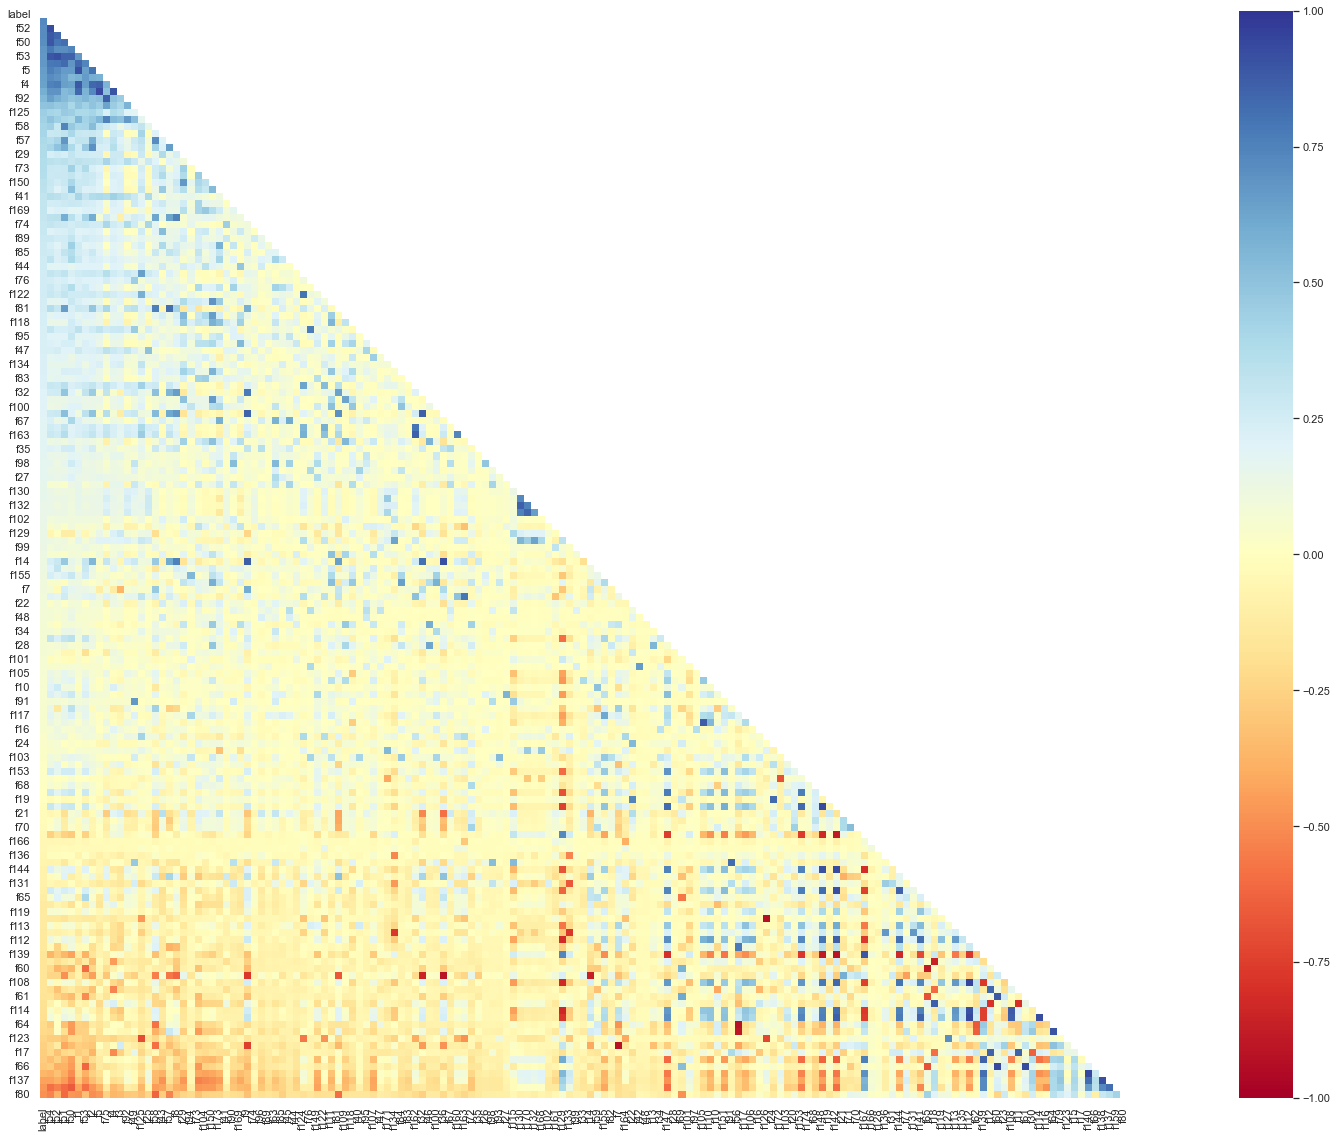

In [ ]:
correlation_map(dataset, 'label', nr_features)

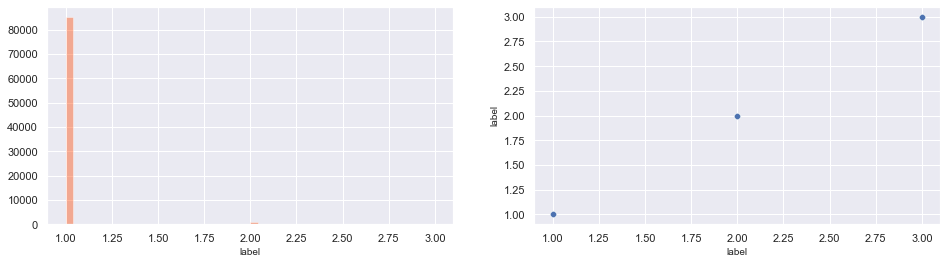

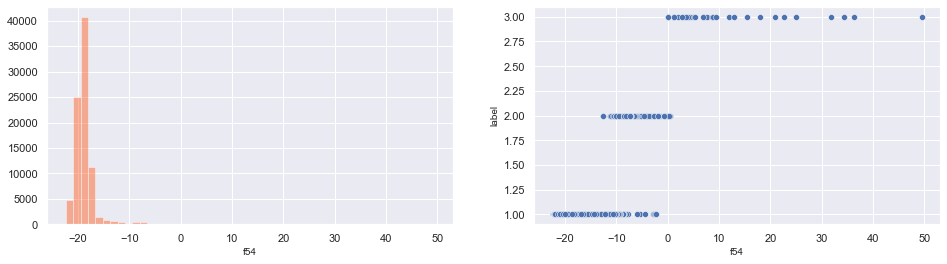

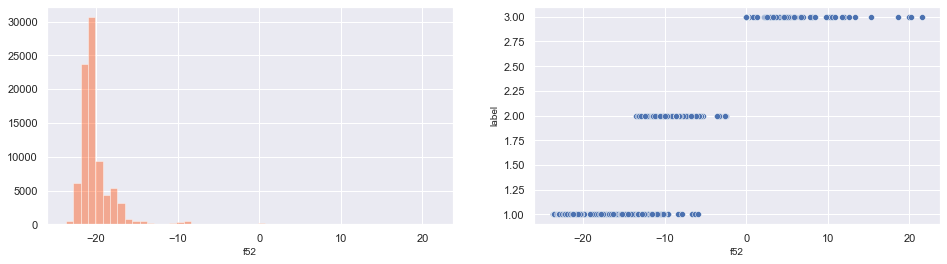

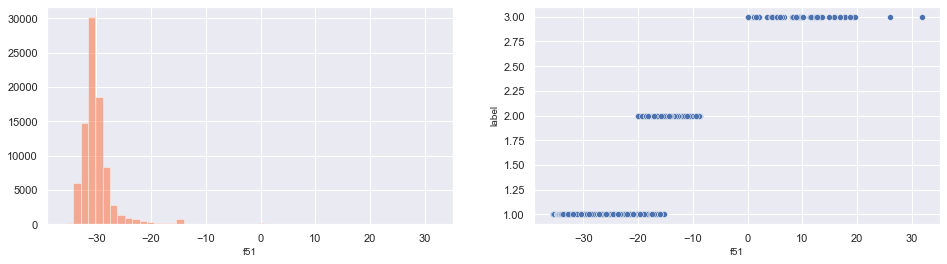

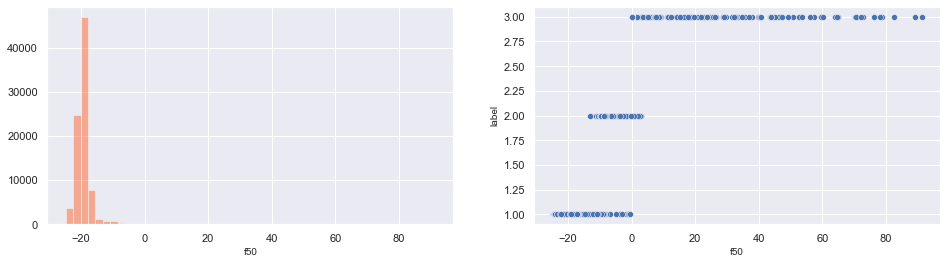

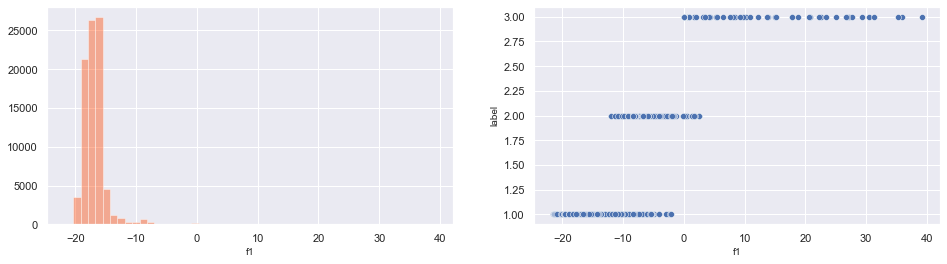

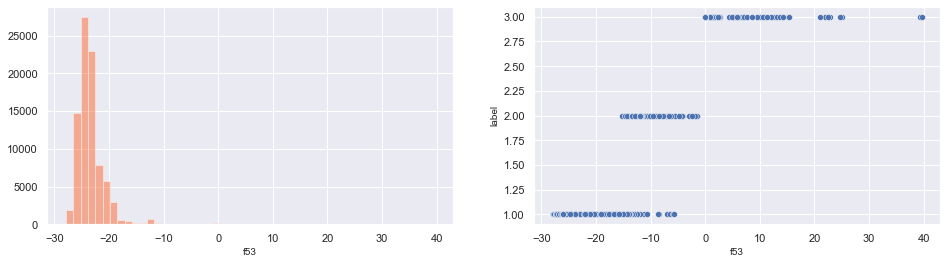

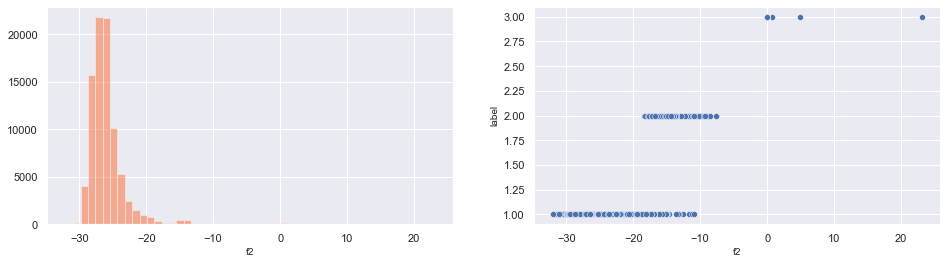

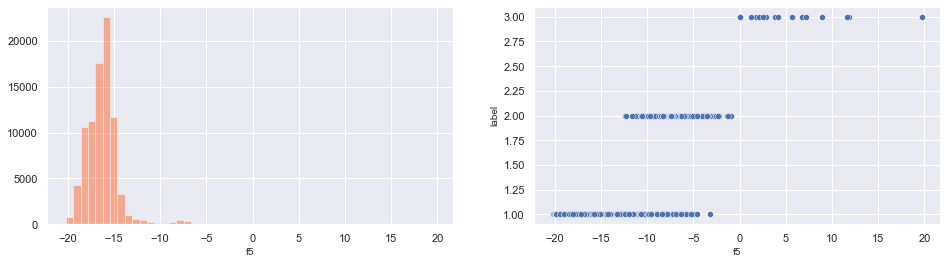

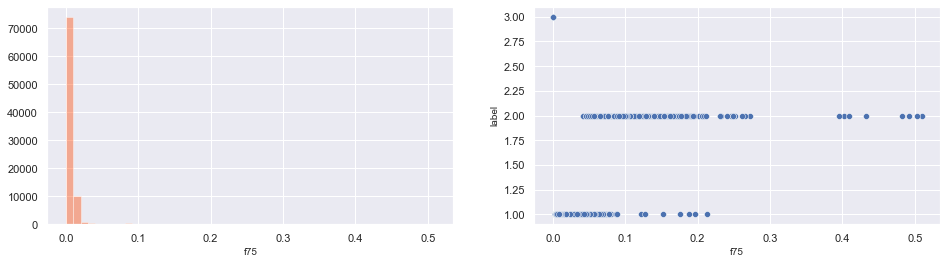

In [ ]:
most_correlated_features = dataset.corr().nlargest(10,'label')['label'].index

for column in most_correlated_features:
    assessment(dataset, 'label', column, -1)

In [ ]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0:1]

In [ ]:
train_size = round(0.8 * len(X))

In [ ]:
X_train = X.iloc[:train_size, :].values
y_train = y.iloc[:train_size]

X_test = X.iloc[train_size:, :].values
y_test = y.iloc[train_size:]

In [ ]:
class_count = pd.Series(y_test.label.value_counts()).sort_index()
print('Class count - Test labels\n')
for i in range(len(class_share)):
    print(f'Class {class_count.index[i]}: {class_count.iloc[i]}')

Class count - Test labels

Class 1: 17002
Class 2: 241
Class 3: 35


In [ ]:
y_train_rf = y_train.label.values
y_test_rf = y_test.label.values

y_train_ann = pd.get_dummies(y_train.label).values
y_test_ann = pd.get_dummies(y_test.label).values

In [ ]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, n_jobs=4)

random_forest_classifier.fit(X_train, y_train_rf)

RandomForestClassifier(n_jobs=4)

In [ ]:
y_pred_rf = random_forest_classifier.predict(X_test)

In [ ]:
print(f'Predicted class: {y_pred_rf[0]}')
print(f'Actual class: {y_test_rf[0]}')

Predicted class: 1
Actual class: 1


In [ ]:
# ANN
ann_classifier = Sequential()

# Input layer and first dense layer
ann_classifier.add(Dense(units = 204, kernel_initializer = 'uniform', activation = 'relu', input_dim = 155))
ann_classifier.add(Dropout(0.1))

# Second dense layer
ann_classifier.add(Dense(units = 204, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dropout(0.1))

# Third dense layer
ann_classifier.add(Dense(units = 102, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dropout(0.1))

# Output layer
ann_classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))

# Model compilation

optim = Adam(learning_rate=0.0005)

ann_classifier.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
ann_train_history = ann_classifier.fit(X_train, y_train_ann, batch_size = 64, epochs = 50, verbose=0)

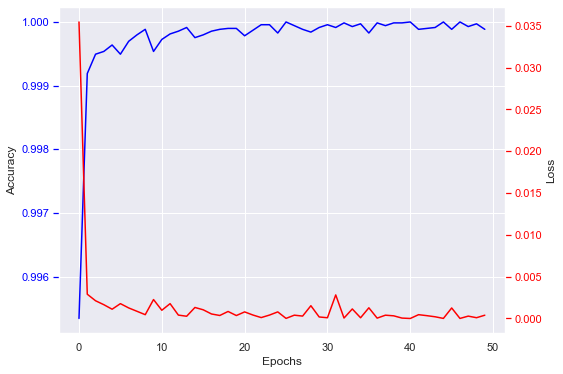

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6))
sns.set_style("darkgrid")
ax2 = ax1.twinx()
ax1.plot(ann_train_history.history['accuracy'], color='blue')
ax2.plot(ann_train_history.history['loss'], color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='y', colors='blue')
ax2.set_ylabel('Loss')
ax2.tick_params(axis='y', colors='red')
ax2.grid(False)
plt.show()


In [ ]:
y_pred_ann = ann_classifier.predict(X_test)
for i in range(len(y_pred_ann)):
    for j in range(len(class_share)):
        if y_pred_ann[i][j] == y_pred_ann[i].max():
            y_pred_ann[i][j] = 1
        else:
            y_pred_ann[i][j] = 0
y_pred_ann = y_pred_ann.astype(int)


In [ ]:
print(f'Predicted: {y_pred_ann[0]}')
print(f'Actual: {y_test_ann[0]}')

Predicted: [1 0 0]
Actual: [ True False False]


In [ ]:
rf_cm = np.zeros((3,3))

In [ ]:
rf_pred_correct = 0
rf_pred_incorrect = 0
for i in range(len(y_test)):
    rf_index_test = y_test_rf[i] - 1
    rf_index_pred = y_pred_rf[i] - 1
    rf_cm[rf_index_test][rf_index_pred] += 1
    if rf_index_test == rf_index_pred:
        rf_pred_correct += 1
    else:
        rf_pred_incorrect += 1

In [ ]:
rf_cmatrix = pd.DataFrame(rf_cm.astype(int),
                          index = ['Cropland', 'Other Plants', 'Dirt'],
                          columns = ['Cropland', 'Other Plants', 'Dirt'])
rf_cmatrix

Cropland  Other Plants  Dirt
Cropland         16998             4     0
Other Plants         0           241     0
Dirt                 0             0    35

In [ ]:
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
rf_precision, rf_recall, rf_f_score, rf_support = precision_recall_fscore_support(y_test_rf, y_pred_rf, average='macro')
print(f'Accuracy: {rf_accuracy * 100:.2f} %')
print(f'Precision: {rf_precision * 100:.2f} %')
print(f'Recall: {rf_recall * 100:.2f} %')
print(f'F-Score: {rf_f_score * 100:.2f} %')

Accuracy: 99.98 %
Precision: 99.46 %
Recall: 99.99 %
F-Score: 99.72 %


In [ ]:
print('Accuracy per class\n')
for i in range(len(rf_cmatrix)):
    class_accuracy = rf_cmatrix.iloc[i,i] / rf_cmatrix.sum(axis=0)[i]
    print(f'{rf_cmatrix.columns[i]}: {class_accuracy*100:.2f} %')

Accuracy per class

Cropland: 100.00 %
Other Plants: 98.37 %
Dirt: 100.00 %


In [ ]:
ann_cm = np.zeros((3,3))

In [ ]:
ann_pred_correct = 0
ann_pred_incorrect = 0
for i in range(len(y_test_ann)):
    if y_pred_ann[i].sum() > 0:
        ann_index_test = np.where(y_test_ann[i] == 1)[0][0]
        ann_index_pred = np.where(y_pred_ann[i] == 1)[0][0]
        ann_cm[ann_index_test][ann_index_pred] += 1
        if ann_index_test == ann_index_pred:
            ann_pred_correct += 1
        else:
            ann_pred_incorrect += 1

In [ ]:
ann_cmatrix = pd.DataFrame(ann_cm.astype(int),
                           index = ['Cropland', 'Other Plants', 'Dirt'],
                           columns = ['Cropland', 'Other Plants', 'Dirt'])
ann_cmatrix

Cropland  Other Plants  Dirt
Cropland         17002             0     0
Other Plants         3           238     0
Dirt                 0             1    34

In [ ]:
ann_accuracy = accuracy_score(y_test_ann, y_pred_ann)
ann_precision, ann_recall, ann_f_score, ann_support = precision_recall_fscore_support(y_test_ann, y_pred_ann, average='macro')
print(f'Accuracy: {ann_accuracy * 100:.2f} %')
print(f'Precision: {ann_precision * 100:.2f} %')
print(f'Recall: {ann_recall * 100:.2f} %')
print(f'F-Score: {ann_f_score * 100:.2f} %')

Accuracy: 99.98 %
Precision: 99.85 %
Recall: 98.63 %
F-Score: 99.24 %


In [ ]:
print('Accuracy per class\n')
for i in range(len(ann_cmatrix)):
    class_accuracy = ann_cmatrix.iloc[i,i] / ann_cmatrix.sum(axis=0)[i]
    print(f'{ann_cmatrix.columns[i]}: {class_accuracy*100:.2f} %')

Accuracy per class

Cropland: 99.98 %
Other Plants: 99.58 %
Dirt: 100.00 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

# Create a Decision Tree model
decision_tree_classifier = DecisionTreeClassifier()

# Train the model on the training data
decision_tree_classifier.fit(X_train, y_train_rf)

# Make predictions on the test data
y_pred_dt = decision_tree_classifier.predict(X_test)

# Display some metrics and confusion matrix
dt_cmatrix = confusion_matrix(y_test_rf, y_pred_dt)
dt_accuracy = accuracy_score(y_test_rf, y_pred_dt)
dt_precision, dt_recall, dt_f_score, dt_support = precision_recall_fscore_support(y_test_rf, y_pred_dt, average='macro')

print('Decision Tree Metrics:')
print(f'Accuracy: {dt_accuracy * 100:.2f} %')
print(f'Precision: {dt_precision * 100:.2f} %')
print(f'Recall: {dt_recall * 100:.2f} %')
print(f'F-Score: {dt_f_score * 100:.2f} %')

Decision Tree Metrics:
Accuracy: 99.96 %
Precision: 99.58 %
Recall: 99.44 %
F-Score: 99.51 %


In [ ]:
dt_cmatrix = pd.DataFrame(dt_cmatrix.astype(int),
                          index=['Cropland', 'Other Plants', 'Dirt'],
                          columns=['Cropland', 'Other Plants', 'Dirt'])
dt_cmatrix

Cropland  Other Plants  Dirt
Cropland         16999             3     0
Other Plants         4           237     0
Dirt                 0             0    35

In [ ]:
print('Accuracy per class\n')
for i in range(len(dt_cmatrix)):
    class_accuracy = dt_cmatrix.iloc[i,i] / dt_cmatrix.sum(axis=0)[i]
    print(f'{dt_cmatrix.columns[i]}: {class_accuracy*100:.2f} %')

Accuracy per class

Cropland: 99.98 %
Other Plants: 98.75 %
Dirt: 100.00 %


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px

In [ ]:
class colorss:
    yellows=['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404','#a70000','#ff5252','#ff7b7b','#ffbaba']
    greens=['#ffffd4','#fee391','#fec44f','#fe9929','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#005a32']
cmaps=['flare','icefire','bwr_r','Accent','Spectral','RdGy','afmhot_r','afmhot','inferno','seismic','vlag','vlag_r']

In [ ]:
df=pd.read_csv('C:\\Users\\Manoshi Raha\\OneDrive\\Desktop\\Practice\\Capstone\\Datasets\\yield_df.csv')

In [ ]:
df

Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[28242 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
df.describe().T

count          mean           std      min  \
Unnamed: 0                     28242.0  14120.500000   8152.907488     0.00   
Year                           28242.0   2001.544296      7.051905  1990.00   
hg/ha_yield                    28242.0  77053.332094  84956.612897    50.00   
average_rain_fall_mm_per_year  28242.0   1149.055980    709.812150    51.00   
pesticides_tonnes              28242.0  37076.909344  59958.784665     0.04   
avg_temp                       28242.0     20.542627      6.312051     1.30   

                                      25%       50%        75%        max  
Unnamed: 0                      7060.2500  14120.50   21180.75   28241.00  
Year                            1995.0000   2001.00    2008.00    2013.00  
hg/ha_yield                    19919.2500  38295.00  104676.75  501412.00  
average_rain_fall_mm_per_year    593.0000   1083.00    1668.00    3240.00  
pesticides_tonnes               1702.0000  17529.44   48687.88  367778.00  
avg_temp                          16.7025     21.51      26.00      30.65

In [ ]:
df.describe(include='object')

Area      Item
count   28242     28242
unique    101        10
top     India  Potatoes
freq     4048      4276

In [ ]:
df.drop("Unnamed: 0", axis=1, inplace= True)
df

Area            Item  Year  hg/ha_yield  \
0       Albania           Maize  1990        36613   
1       Albania        Potatoes  1990        66667   
2       Albania     Rice, paddy  1990        23333   
3       Albania         Sorghum  1990        12500   
4       Albania        Soybeans  1990         7000   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[28242 rows x 7 columns]

In [ ]:
# remove countries with less than 100 record
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

In [ ]:
df

Area            Item  Year  hg/ha_yield  \
0       Algeria           Maize  1990        16500   
1       Algeria        Potatoes  1990        78936   
2       Algeria     Rice, paddy  1990        28000   
3       Algeria         Sorghum  1990        16571   
4       Algeria           Wheat  1990         6315   
...         ...             ...   ...          ...   
26292  Zimbabwe     Rice, paddy  2013        22581   
26293  Zimbabwe         Sorghum  2013         3066   
26294  Zimbabwe        Soybeans  2013        13142   
26295  Zimbabwe  Sweet potatoes  2013        22222   
26296  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                               89.0            1828.92     17.48  
1                               89.0            1828.92     17.48  
2                               89.0            1828.92     17.48  
3                               89.0            1828.92     17.48  
4                               89.0            1828.92     17.48  
...                              ...                ...       ...  
26292                          657.0            2550.07     19.76  
26293                          657.0            2550.07     19.76  
26294                          657.0            2550.07     19.76  
26295                          657.0            2550.07     19.76  
26296                          657.0            2550.07     19.76  

[26297 rows x 7 columns]

In [ ]:
datacorr=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

<Axes: >

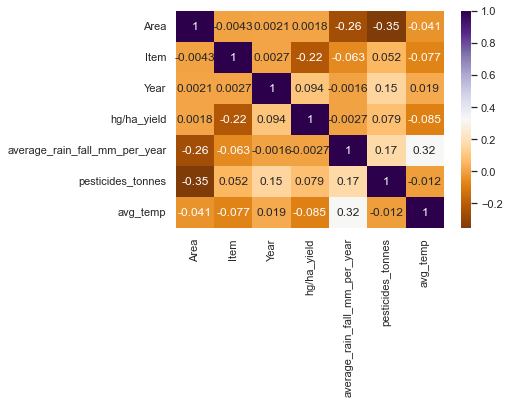

In [ ]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'hg/ha_yield'}>],
       [<Axes: title={'center': 'average_rain_fall_mm_per_year'}>,
        <Axes: title={'center': 'pesticides_tonnes'}>],
       [<Axes: title={'center': 'avg_temp'}>, <Axes: >]], dtype=object)

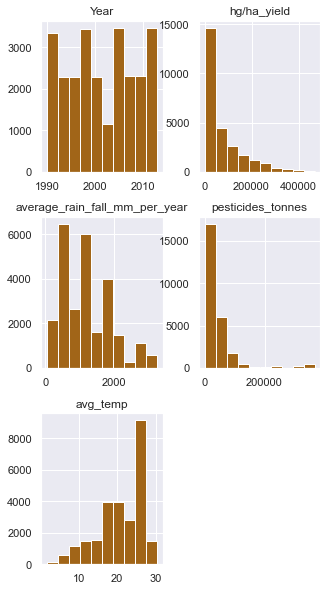

In [ ]:
sns.set_theme(palette='BrBG')
df.hist(figsize=(5,10))

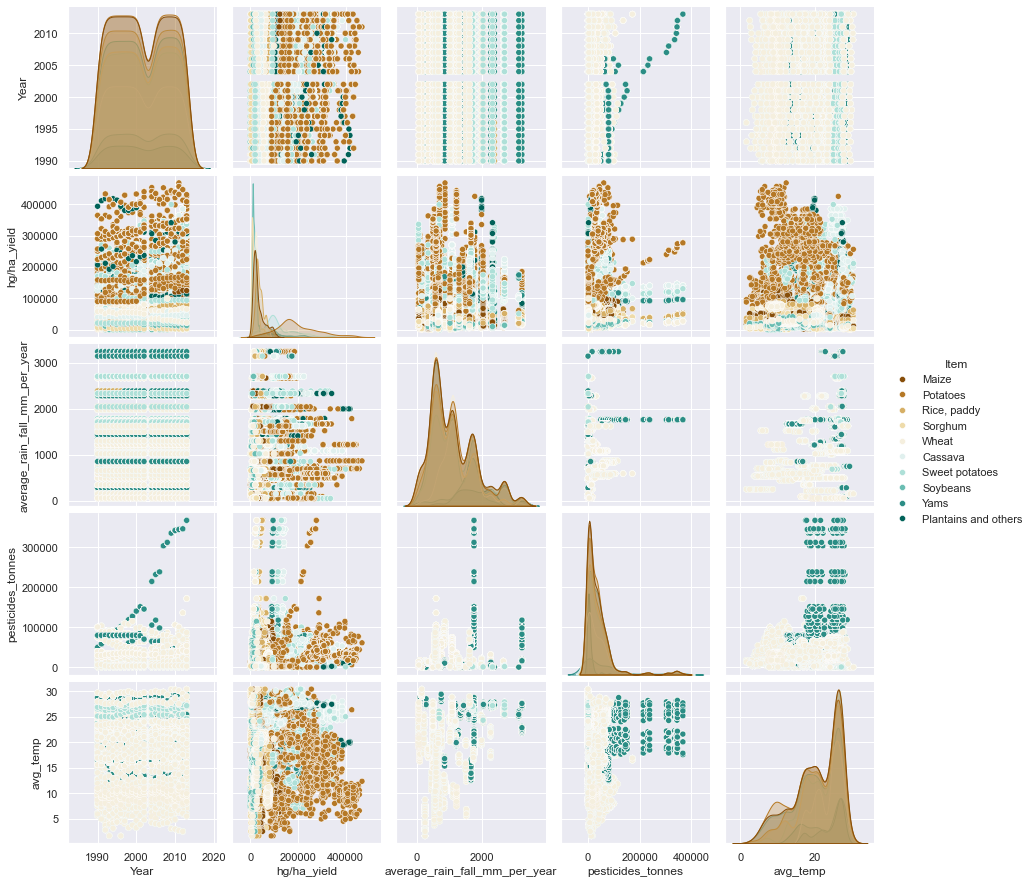

In [ ]:
sns.pairplot(data=df,hue='Item',kind='scatter',palette='BrBG')

<Axes: xlabel='Year'>

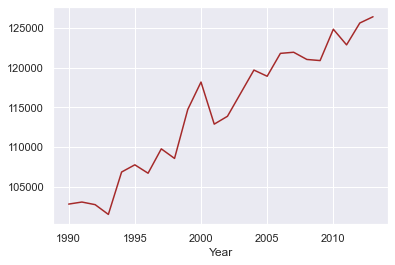

In [ ]:
df2=df[df['Item']=='Yams']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')

In [ ]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data = gpd.read_file(geojson_url)

merged_data = data.merge(df, left_on='NAME', right_on='Area', how='left')

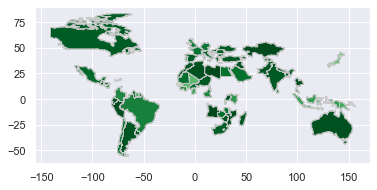

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot( column='hg/ha_yield', cmap='Greens_r', linewidth=0.8, edgecolor='0.8')
# plt.title("Countries")
plt.show()

In [ ]:
del merged_data

In [ ]:
del data

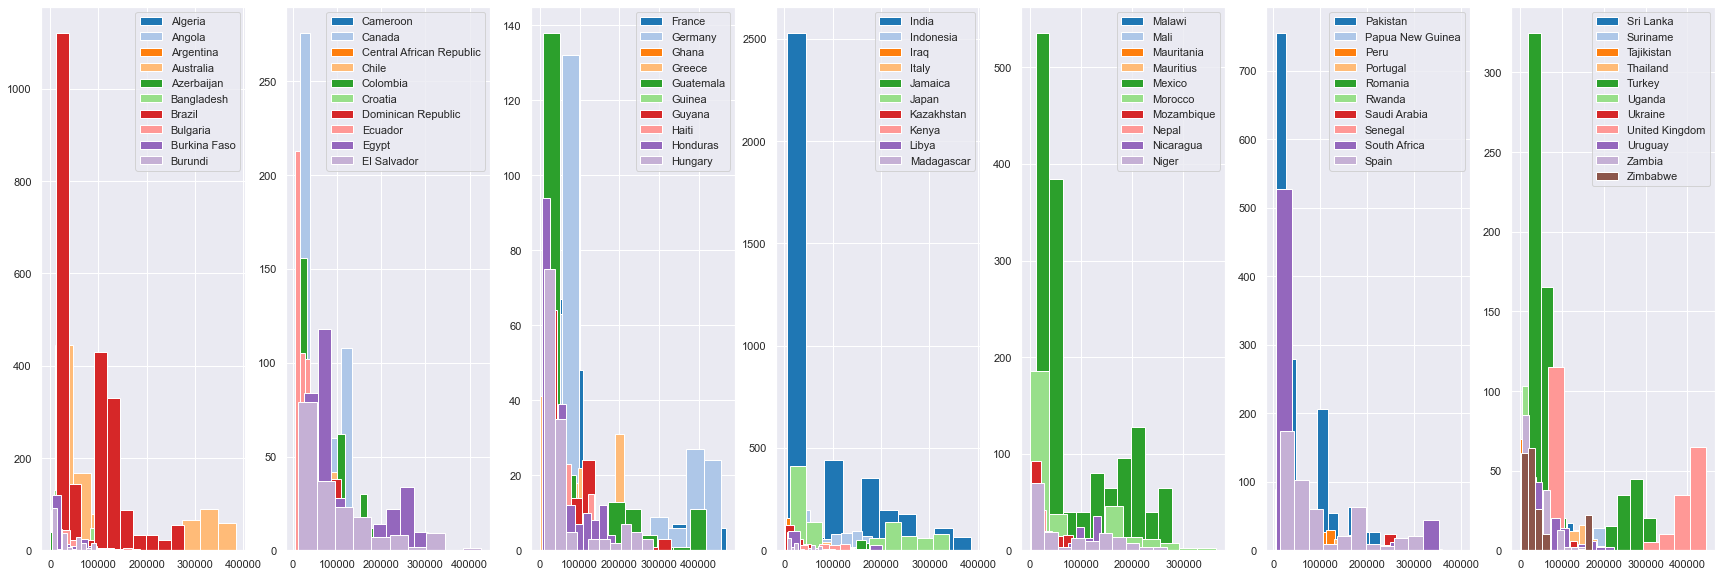

In [ ]:
palette = sns.color_palette('tab20', 21,as_cmap=True)
num_plots = 7
areas_per_plot = 10

# Get unique areas
unique_areas = sorted(df['Area'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]
fig, axs = plt.subplots(ncols=num_plots, figsize=(30, 10))
j=0
for i, ax in enumerate(axs):

    plot_df = df[df['Area'].isin(area_chunks[i])]
    for i, area in enumerate(plot_df['Area'].unique()):
       data = plot_df[plot_df['Area'] == area]
       ax.hist(data['hg/ha_yield'], facecolor=palette(i), label=area)

    ax.legend()
    j+=1

plt.show()

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=True)
    display(dg.head())

hg/ha_yield
Area       Item                 
Angola     Sorghum   2926.769231
Azerbaijan Sorghum   3324.166667
Angola     Soybeans  4235.538462
           Maize     5753.869565
Azerbaijan Soybeans  7599.850000

hg/ha_yield
Area                     Item                  
Ecuador                  Wheat      7111.956522
Cameroon                 Soybeans   7566.782609
Central African Republic Sorghum    9353.913043
                         Maize     10250.869565
Cameroon                 Sorghum   11521.304348

hg/ha_yield
Area     Item                 
Honduras Wheat     5574.130435
Haiti    Maize     7905.565217
         Sorghum   8157.913043
Ghana    Sorghum  10291.347826
Honduras Sorghum  10863.782609

hg/ha_yield
Area       Item                 
Madagascar Soybeans  6267.173913
           Sorghum   6452.304348
Kenya      Sorghum   7744.478261
India      Sorghum   8452.434783
Libya      Wheat     8459.521739

hg/ha_yield
Area       Item                
Niger      Sorghum  2592.913043
Mauritania Sorghum  4673.869565
Mozambique Sorghum  4830.304348
Malawi     Sorghum  6403.086957
Morocco    Sorghum  6594.739130

hg/ha_yield
Area     Item                  
Pakistan Sorghum    6056.043478
Rwanda   Soybeans   6664.869565
Senegal  Sorghum    8159.173913
Pakistan Soybeans   9276.000000
Rwanda   Sorghum   10969.478261

hg/ha_yield
Area       Item                 
Tajikistan Soybeans   941.750000
Zimbabwe   Sorghum   3864.956522
Zambia     Sorghum   6809.608696
Thailand   Wheat     7547.000000
Suriname   Soybeans  9039.869565

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=False)
    display(dg.head())

hg/ha_yield
Area      Item                         
Australia Potatoes        330944.826087
Argentina Potatoes        262059.173913
Australia Sweet potatoes  257610.826087
Brazil    Potatoes        196056.000000
Algeria   Potatoes        182413.956522

hg/ha_yield
Area        Item                               
Egypt       Sweet potatoes        261369.347826
            Potatoes              235444.956522
El Salvador Potatoes              211362.304348
            Plantains and others  198605.217391
Chile       Potatoes              184835.260870

hg/ha_yield
Area      Item                               
France    Potatoes              395037.260870
Germany   Potatoes              386553.347826
Guatemala Plantains and others  291096.304348
          Potatoes              241157.869565
Hungary   Potatoes              210372.782609

hg/ha_yield
Area  Item                         
Japan Potatoes        311005.260870
India Cassava         282234.434783
Italy Potatoes        237861.347826
Japan Sweet potatoes  237639.391304
      Yams            211343.434783

hg/ha_yield
Area      Item                         
Mexico    Potatoes        228553.695652
Morocco   Potatoes        217065.695652
Mauritius Potatoes        211356.869565
Mali      Potatoes        195653.869565
Mexico    Sweet potatoes  194611.913043

hg/ha_yield
Area             Item                   
South Africa     Potatoes  297195.434783
Spain            Potatoes  251421.695652
Saudi Arabia     Potatoes  223336.652174
Senegal          Potatoes  180499.608696
Papua New Guinea Yams      172521.173913

hg/ha_yield
Area           Item                               
United Kingdom Potatoes              406131.695652
Turkey         Potatoes              265486.565217
Suriname       Plantains and others  253966.913043
               Cassava               191282.478261
Tajikistan     Potatoes              176549.190476

In [ ]:
dk=df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
dk.sort_values(by=['hg/ha_yield'],ascending=False)

hg/ha_yield
Area           Item                   
United Kingdom Potatoes  406131.695652
France         Potatoes  395037.260870
Germany        Potatoes  386553.347826
Australia      Potatoes  330944.826087
Japan          Potatoes  311005.260870
...                                ...
Zimbabwe       Sorghum     3864.956522
Azerbaijan     Sorghum     3324.166667
Angola         Sorghum     2926.769231
Niger          Sorghum     2592.913043
Tajikistan     Soybeans     941.750000

[495 rows x 1 columns]

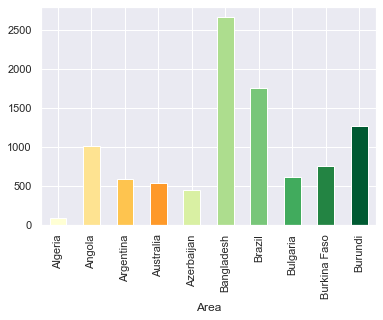

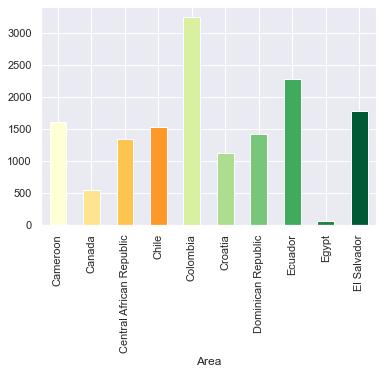

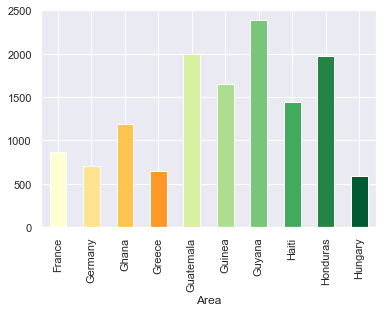

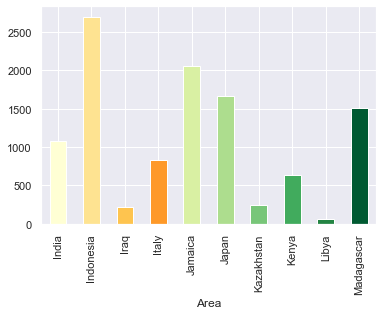

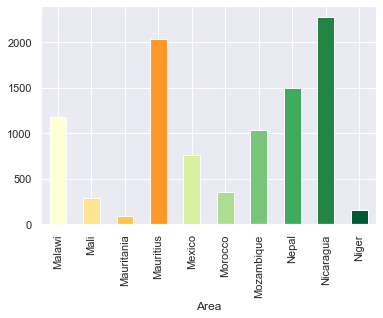

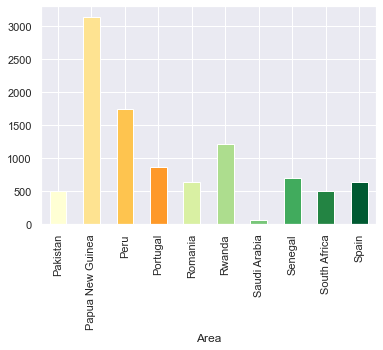

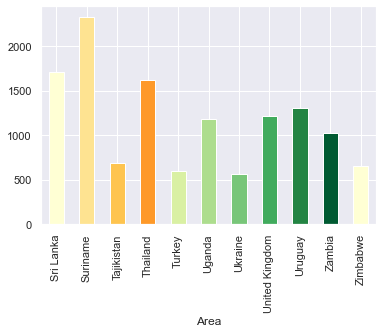

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['average_rain_fall_mm_per_year'].mean().plot(kind='bar',rot=0,color=colorss.greens)
    plt.xticks(rotation=90)
    plt.show()

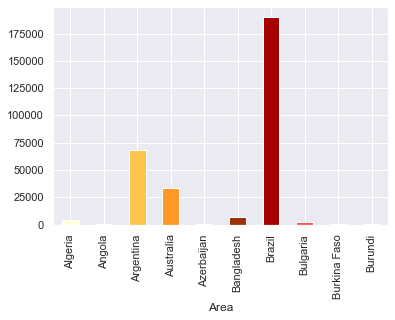

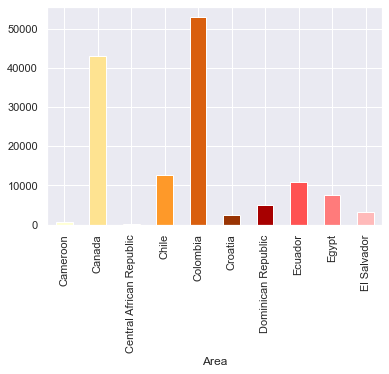

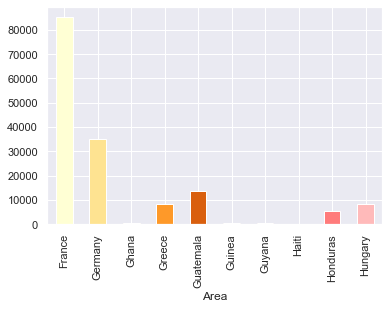

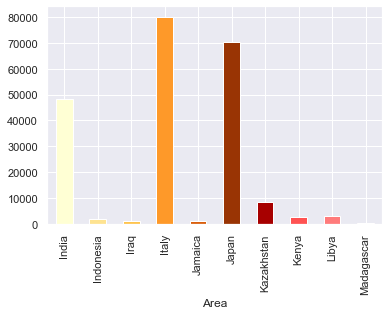

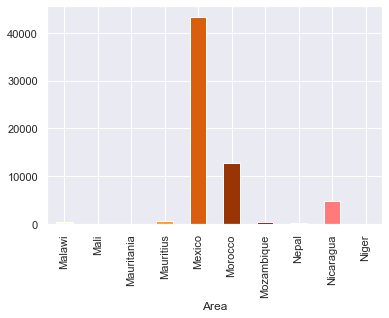

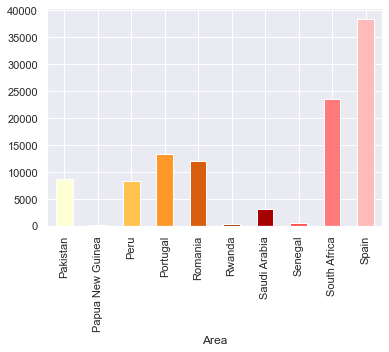

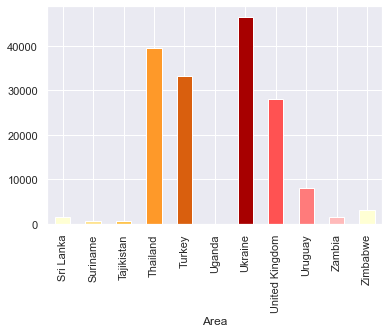

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['pesticides_tonnes'].mean().plot(kind='bar',rot=0,color=colorss.yellows)
    plt.xticks(rotation=90)
    plt.show()

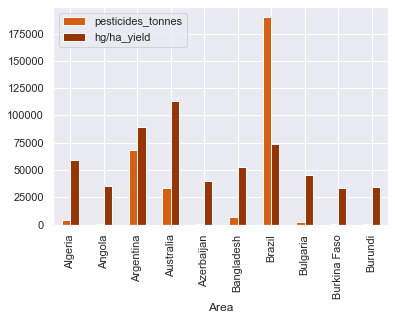

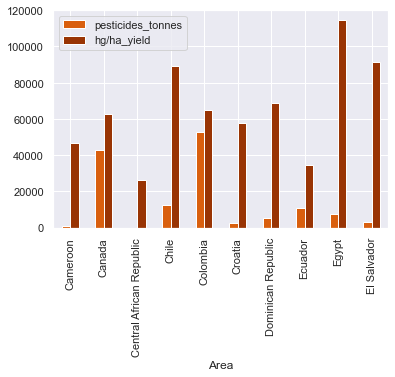

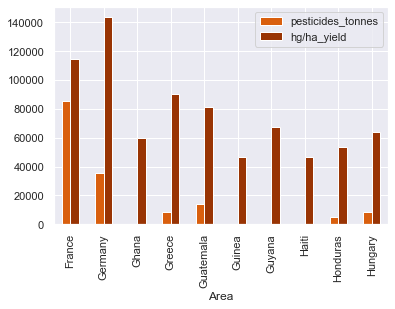

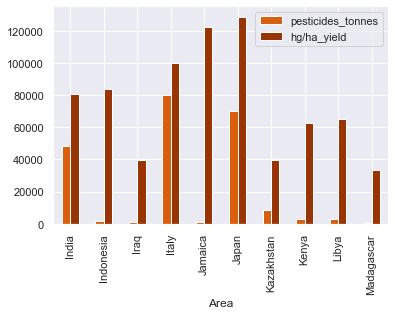

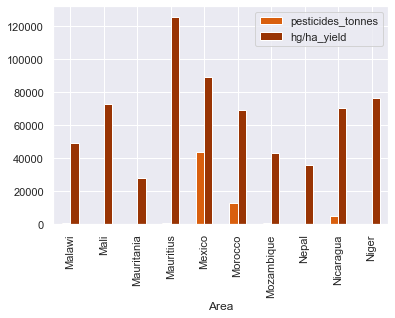

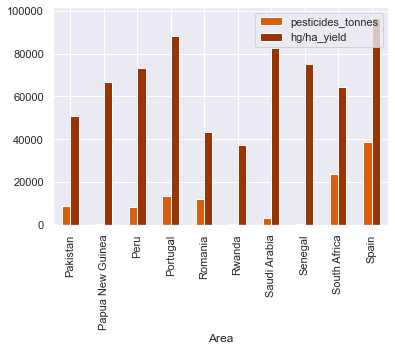

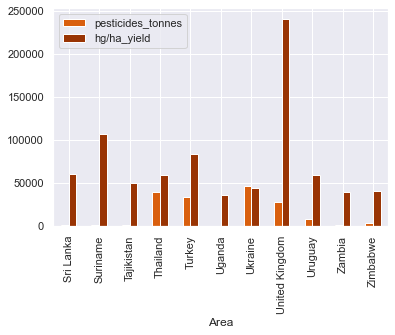

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby('Area')[['pesticides_tonnes', 'hg/ha_yield']].mean().plot(kind='bar',rot=0,color=colorss.yellows[-6:])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
px.scatter(df, x='hg/ha_yield', y='pesticides_tonnes',color="Area",color_discrete_sequence=colorss.greens)

In [ ]:
num_plots = 7
areas_per_plot = 10

# Get unique areas
unique_areas = sorted(df['Area'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]
fig, axs = plt.subplots(ncols=num_plots)
j=0
for i, ax in enumerate(axs):

    plot_df = df[df['Area'].isin(area_chunks[i])]

    ax = px.scatter(plot_df, x='hg/ha_yield', y='pesticides_tonnes',color="Area",color_discrete_sequence=colorss.greens)
    j+=1

    ax.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

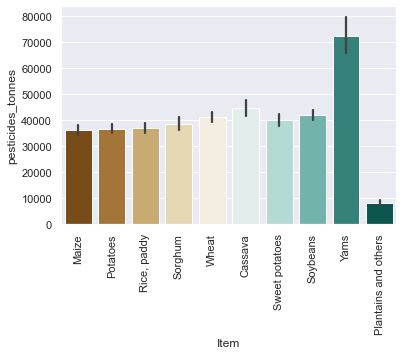

In [ ]:
sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Item', ylabel='hg/ha_yield'>

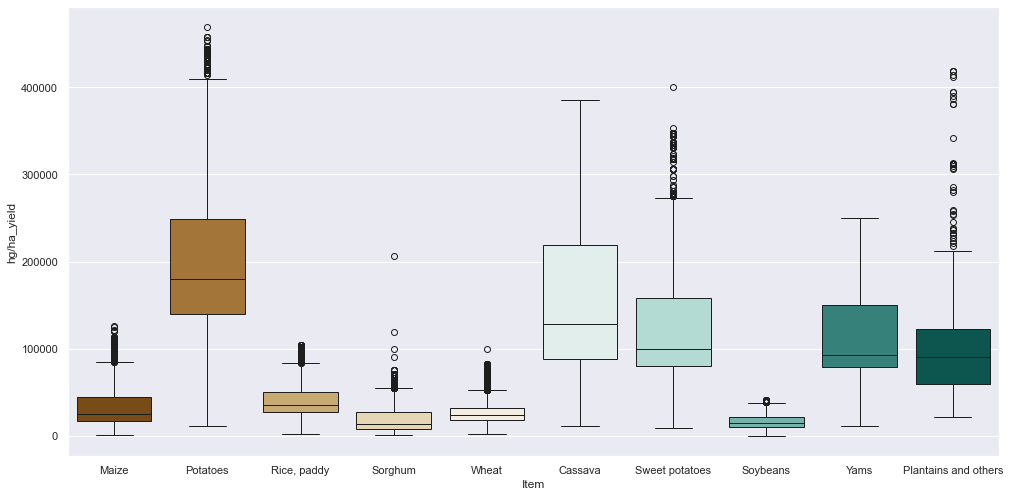

In [ ]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="BrBG",data=df,ax=ax)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Maize'),
  Text(1, 0, 'Potatoes'),
  Text(2, 0, 'Rice, paddy'),
  Text(3, 0, 'Sorghum'),
  Text(4, 0, 'Wheat'),
  Text(5, 0, 'Cassava'),
  Text(6, 0, 'Sweet potatoes'),
  Text(7, 0, 'Soybeans'),
  Text(8, 0, 'Yams'),
  Text(9, 0, 'Plantains and others')])

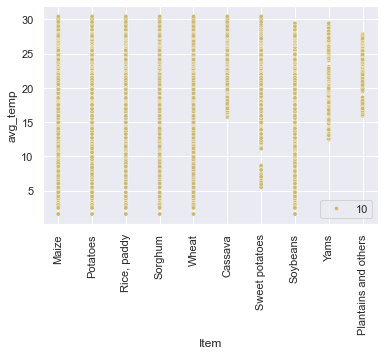

In [ ]:
sns.scatterplot(x = 'Item', y = 'avg_temp', data = df,size=10,color='y')
plt.xticks(rotation=90)

In [ ]:
grouped = df.groupby('Item')

best_areas = []

for item, group in grouped:
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]

    area = max_production_row['Area'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]

    best_areas.append({'Item': item, 'Area': area, 'hg/ha_yield': production})

best_areas_df = pd.DataFrame(best_areas)

best_areas_df

Item        Area  hg/ha_yield
0               Cassava       India       385818
1                 Maize  Tajikistan       125670
2  Plantains and others   Guatemala       418505
3              Potatoes      France       468991
4           Rice, paddy   Australia       103895
5               Sorghum     Algeria       206000
6              Soybeans      Turkey        41609
7        Sweet potatoes     Senegal       400000
8                 Wheat      Zambia        99387
9                  Yams        Mali       250000

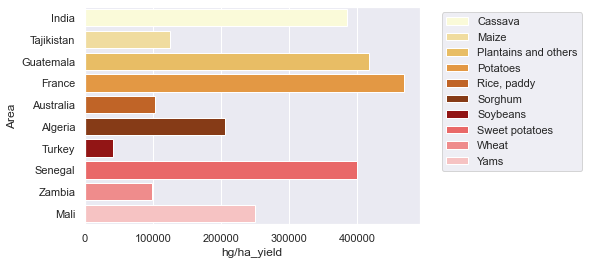

In [ ]:
ax=sns.barplot(data=best_areas_df,x='hg/ha_yield',y='Area',hue='Item',palette=colorss.yellows)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

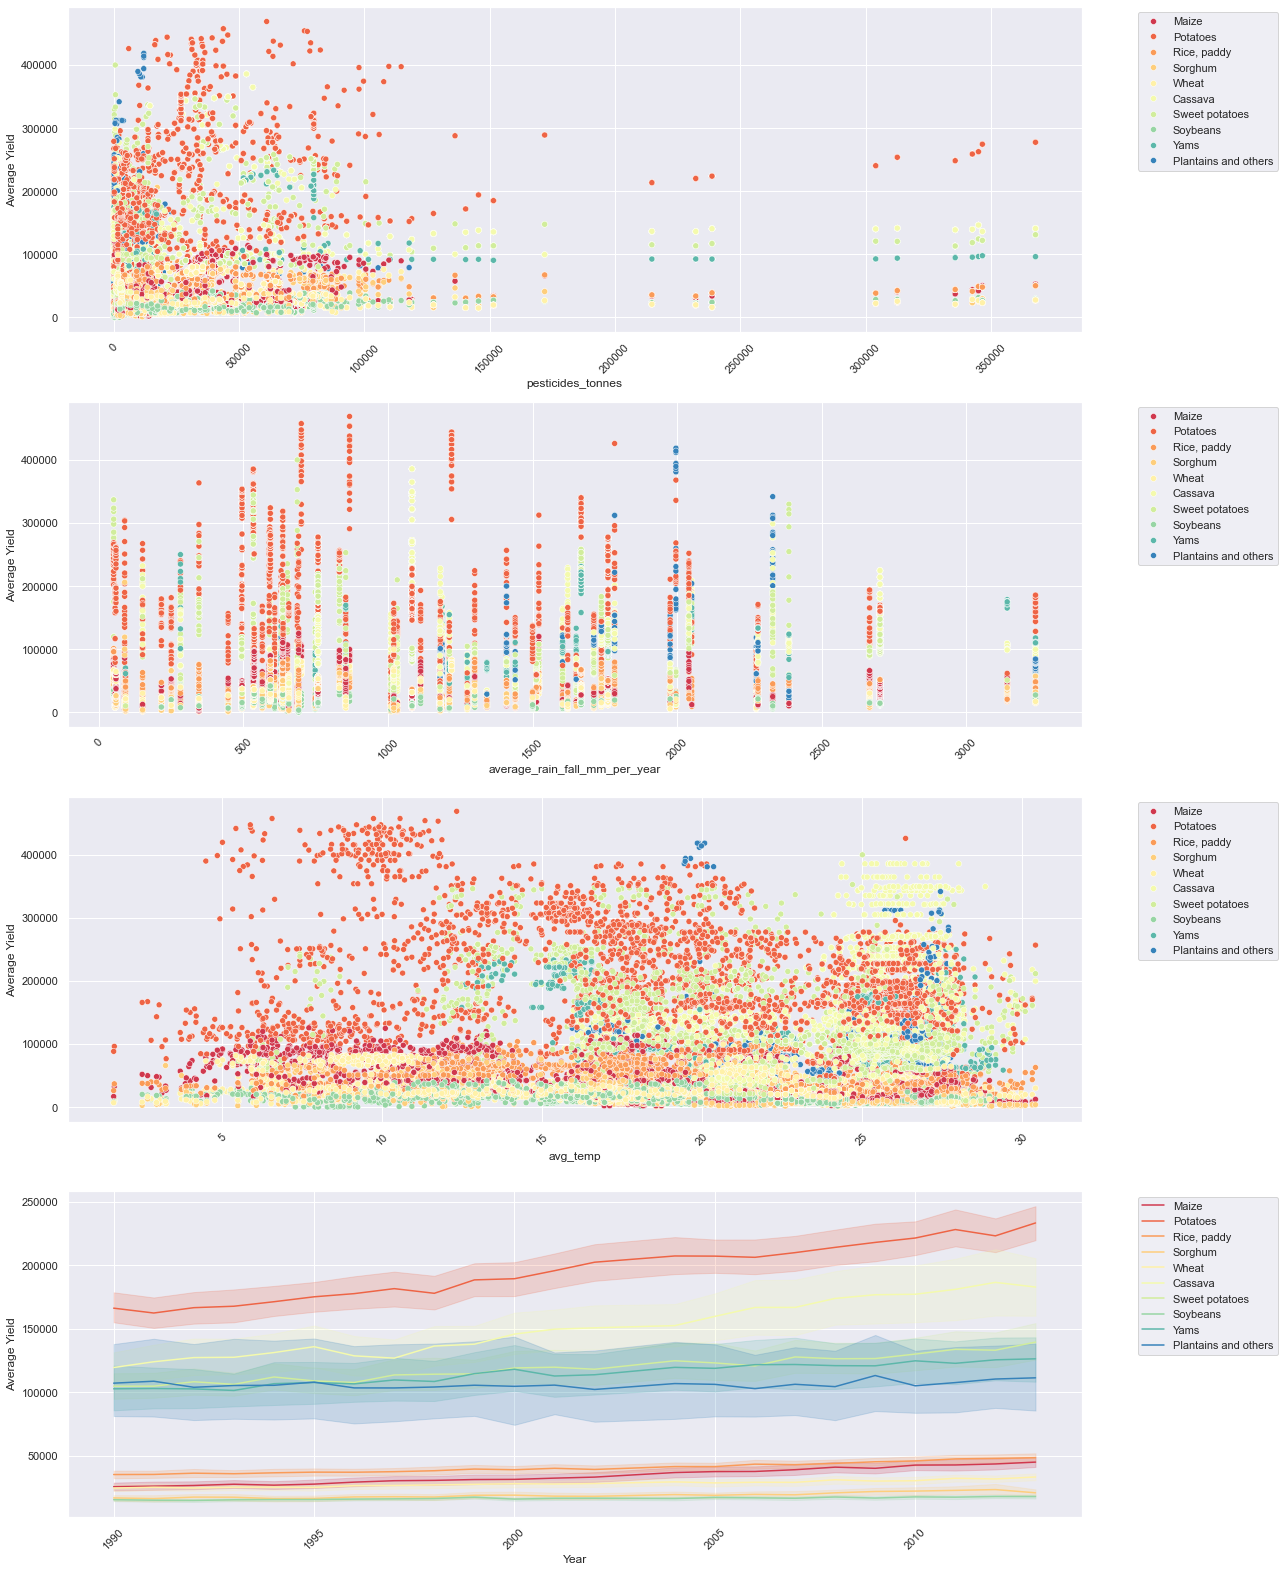

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(18, 22))

sns.scatterplot(x = "pesticides_tonnes", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[0], legend = True,palette='Spectral')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Yield')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "average_rain_fall_mm_per_year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[1], legend = True,palette='Spectral')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Yield')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "avg_temp", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[2], legend = True,palette='Spectral')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('Average Yield')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(x = "Year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[3], legend = True,palette='Spectral')
axes[3].tick_params(axis='x', rotation=45)
axes[3].set_ylabel('Average Yield')
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
def change_of_years(data, template='seaborn'):
    col = data.columns[3:].tolist()
    for i in col:
        sns.lineplot(data.groupby(['Year'])[i].mean(),color='brown')
        plt.title=f'Effect of Years on the {i}'


        plt.show()
        yield()

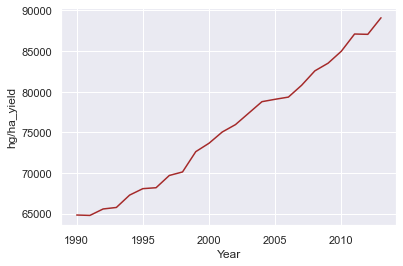

()

In [ ]:
yplot = change_of_years(df)
next(yplot)

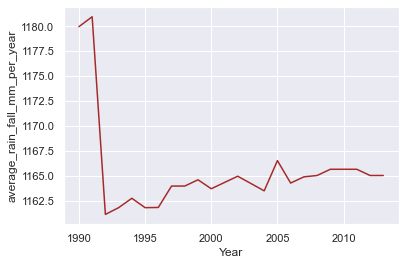

()

In [ ]:
next(yplot)

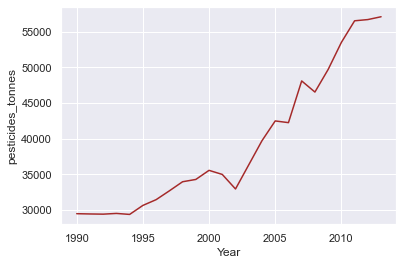

()

In [ ]:
next(yplot)

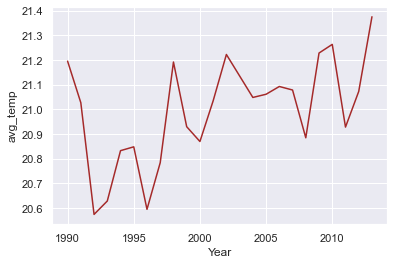

()

In [ ]:
next(yplot)

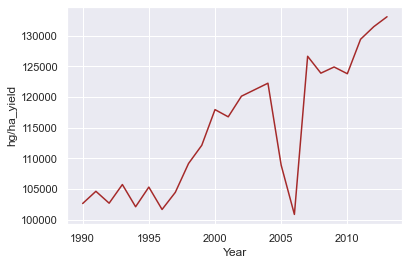

()

In [ ]:
df_Egypt = df.loc[df['Area'] == 'Egypt']
yplot = change_of_years(df_Egypt)
next(yplot)

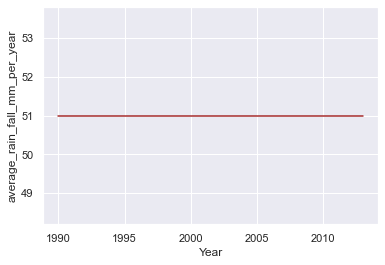

()

In [ ]:
next(yplot)

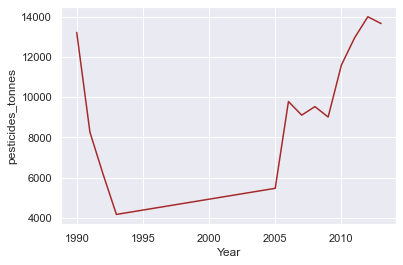

()

In [ ]:
next(yplot)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
#X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']
def get_feature_target(data):
    X = data.drop(labels='hg/ha_yield', axis=1)
    y = data['hg/ha_yield']
    return X, y

X, y = get_feature_target(datacorr)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The accuracy of the Linear Regression Model Train is 7.39
The accuracy of the  Linear Regression Model Test is 7.37


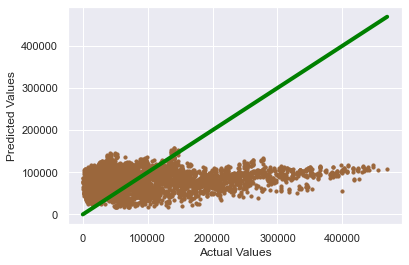

The accuracy of the Random Forest Model Train is 99.80
The accuracy of the  Random Forest Model Test is 98.56


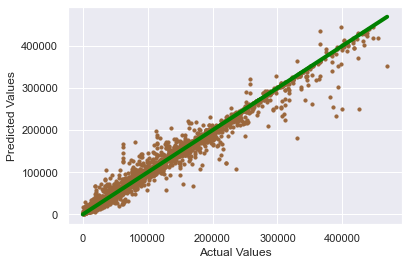

The accuracy of the Gradient Boost Model Train is 84.47
The accuracy of the  Gradient Boost Model Test is 83.11


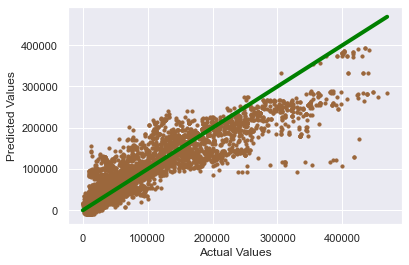

The accuracy of the XGBoost Model Train is 98.82
The accuracy of the  XGBoost Model Test is 97.43


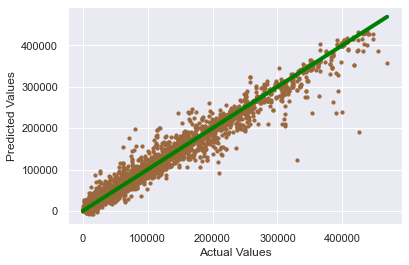

The accuracy of the KNN Model Train is 56.73
The accuracy of the  KNN Model Test is 28.90


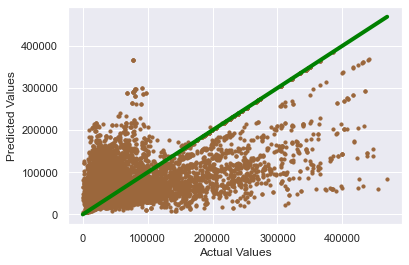

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 97.62


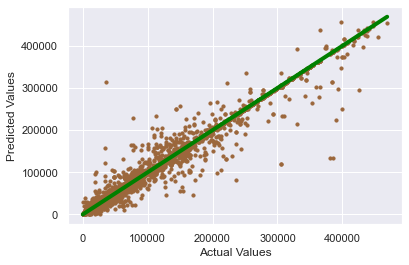

The accuracy of the Bagging Regressor Model Train is 99.81
The accuracy of the  Bagging Regressor Model Test is 98.59


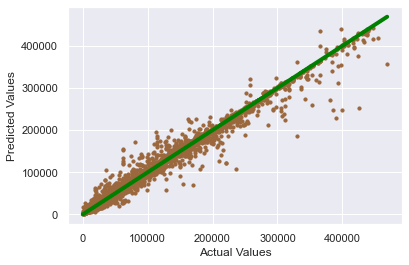

In [ ]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)

In [ ]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))

    print(name)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf)

    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score}")

    mean_score = np.mean(scores)
    print(f"Mean Score: {mean_score}")
    print('-'*30)


df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
df_styled_best = df.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE','MAE','MAPE'], color='green').highlight_max(subset=['MSE','MAE','MAPE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)

Linear Regression
Fold 1: 0.07240659283189477
Fold 2: 0.07312815917151971
Fold 3: 0.0774883463084719
Fold 4: 0.07087353115314943
Fold 5: 0.07249428006407299
Mean Score: 0.07327818190582176
------------------------------
Random Forest
Fold 1: 0.9864203016619248
Fold 2: 0.9872924072885105
Fold 3: 0.9902673568678747
Fold 4: 0.9881828990274132
Fold 5: 0.9867227013299428
Mean Score: 0.9877771332351332
------------------------------
Gradient Boost
Fold 1: 0.8437700480261596
Fold 2: 0.8452933943276723
Fold 3: 0.8406144951432195
Fold 4: 0.8420245149483954
Fold 5: 0.8420300081303572
Mean Score: 0.8427464921151607
------------------------------
XGBoost
Fold 1: 0.9798744400188216
Fold 2: 0.9774860208008666
Fold 3: 0.973494799759912
Fold 4: 0.9799285436615028
Fold 5: 0.9783451993018222
Mean Score: 0.9778258007085852
------------------------------
KNN
Fold 1: 0.3258510527221855
Fold 2: 0.36042107079697416
Fold 3: 0.3592121236582787
Fold 4: 0.344622292522352
Fold 5: 0.32401223915494104
Mean Score: 0

In [ ]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Selecting base models
base_models = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42))
]

# Creating meta learner
meta_learner = LinearRegression()

# Implementing StackingRegressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_learner)

# Implementing VotingRegressor
voting_regressor = VotingRegressor(estimators=base_models)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the ensemble models
stacking_regressor.fit(X_train, y_train)
voting_regressor.fit(X_train, y_train)

# Evaluating the models
stacking_score = stacking_regressor.score(X_test, y_test)
voting_score = voting_regressor.score(X_test, y_test)

print(f'Stacking Regressor Accuracy: {stacking_score}')
print(f'Voting Regressor Accuracy: {voting_score}')


Stacking Regressor Accuracy: 0.9859677823820033
Voting Regressor Accuracy: 0.9713128167871007
